# House Price Predictions

This notebook is created to predict house prices based on [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf). The Kaggle competition is found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

File descriptions

* **train.csv** - the training set
* **test.csv** - the test set
* **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


Here's a brief version of what you'll find in the data description file:

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass:** The building class
* **MSZoning:** The general zoning classification
* **LotFrontage:** Linear feet of street connected to property
* **LotArea:** Lot size in square feet
* **Street:** Type of road access
* **Alley:** Type of alley access
* **LotShape:** General shape of property
* **LandContour:** Flatness of the property
* **Utilities:** Type of utilities available
* **LotConfig:** Lot configuration
* **LandSlope:** Slope of property
* **Neighborhood:** Physical locations within Ames city limits
* **Condition1:** Proximity to main road or railroad
* **Condition2:** Proximity to main road or railroad (if a second is present)
* **BldgType:** Type of dwelling
* **HouseStyle:** Style of dwelling
* **OverallQual:** Overall material and finish quality
* **OverallCond:** Overall condition rating
* **YearBuilt:** Original construction date
* **YearRemodAdd:** Remodel date
* **RoofStyle:** Type of roof
* **RoofMatl:** Roof material
* **Exterior1st:** Exterior covering on house
* **Exterior2nd:** Exterior covering on house (if more than one material)
* **MasVnrType:** Masonry veneer type
* **MasVnrArea:** Masonry veneer area in square feet
* **ExterQual:** Exterior material quality
* **ExterCond:** Present condition of the material on the exterior
* **Foundation:** Type of foundation
* **BsmtQual:** Height of the basement
* **BsmtCond:** General condition of the basement
* **BsmtExposure:** Walkout or garden level basement walls
* **BsmtFinType1:** Quality of basement finished area
* **BsmtFinSF1:** Type 1 finished square feet
* **BsmtFinType2:** Quality of second finished area (if present)
* **BsmtFinSF2:** Type 2 finished square feet
* **BsmtUnfSF:** Unfinished square feet of basement area
* **TotalBsmtSF:** Total square feet of basement area
* **Heating:** Type of heating
* **HeatingQC:** Heating quality and condition
* **CentralAir:** Central air conditioning
* **Electrical:** Electrical system
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **LowQualFinSF:** Low quality finished square feet (all floors)
* **GrLivArea:** Above grade (ground) living area square feet
* **BsmtFullBath:** Basement full bathrooms
* **BsmtHalfBath:** Basement half bathrooms
* **FullBath:** Full bathrooms above grade
* **HalfBath:** Half baths above grade
* **Bedroom:** Number of bedrooms above basement level
* **Kitchen:** Number of kitchens
* **KitchenQual:** Kitchen quality
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **Functional:** Home functionality rating
* **Fireplaces:** Number of fireplaces
* **FireplaceQu:** Fireplace quality
* **GarageType:** Garage location
* **GarageYrBlt:** Year garage was built
* **GarageFinish:** Interior finish of the garage
* **GarageCars:** Size of garage in car capacity
* **GarageArea:** Size of garage in square feet
* **GarageQual:** Garage quality
* **GarageCond:** Garage condition
* **PavedDrive:** Paved driveway
* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet
* **PoolArea:** Pool area in square feet
* **PoolQC:** Pool quality
* **Fence:** Fence quality
* **MiscFeature:** Miscellaneous feature not covered in other categories
* **MiscVal:** $Value of miscellaneous feature
* **MoSold:** Month Sold
* **YrSold:** Year Sold
* **SaleType:** Type of sale
* **SaleCondition:** Condition of sale



## Exploratory Data Analysis

Let's explore the dataset for patterns, insights, anomalies, missing values, correlations, and etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

import xgboost as xgb
import lightgbm as lgb

In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

### Analysing Features for Correlations and Missing Values

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Let's see which features are numerical and which features are categorical to go on with our analysis:

In [4]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
cat_features = train.select_dtypes(include=[np.object])
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### Correlation Coefficients

Now let's take a look at the correlation coefficients between numeric features and SalePrice. Here we can use 4 visualization techniques:

* Correlation Heat Map
* Zoomed Heat Map
* Pair Plot
* Scatter Plot

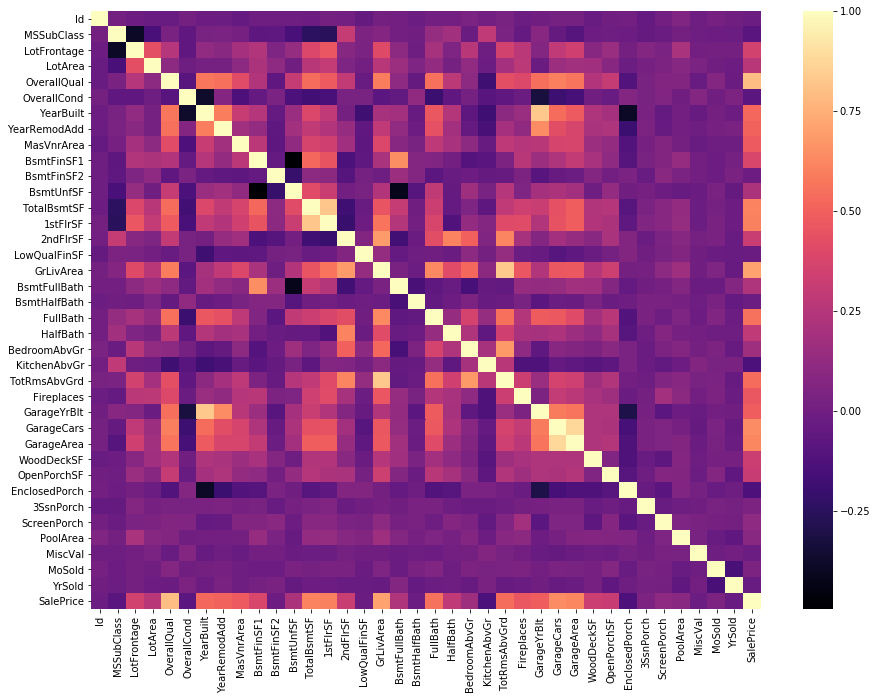

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15,11)
sns.heatmap(train.corr(), cmap="magma")

Let's take a closer look to the most correlated features to the SalePrice:

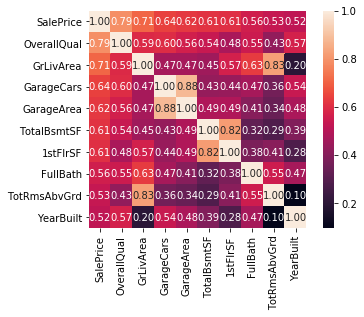

In [7]:
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

From here we can see that there are features that seem to be highly correlated to the SalePrice. Let's take a closer look to them:

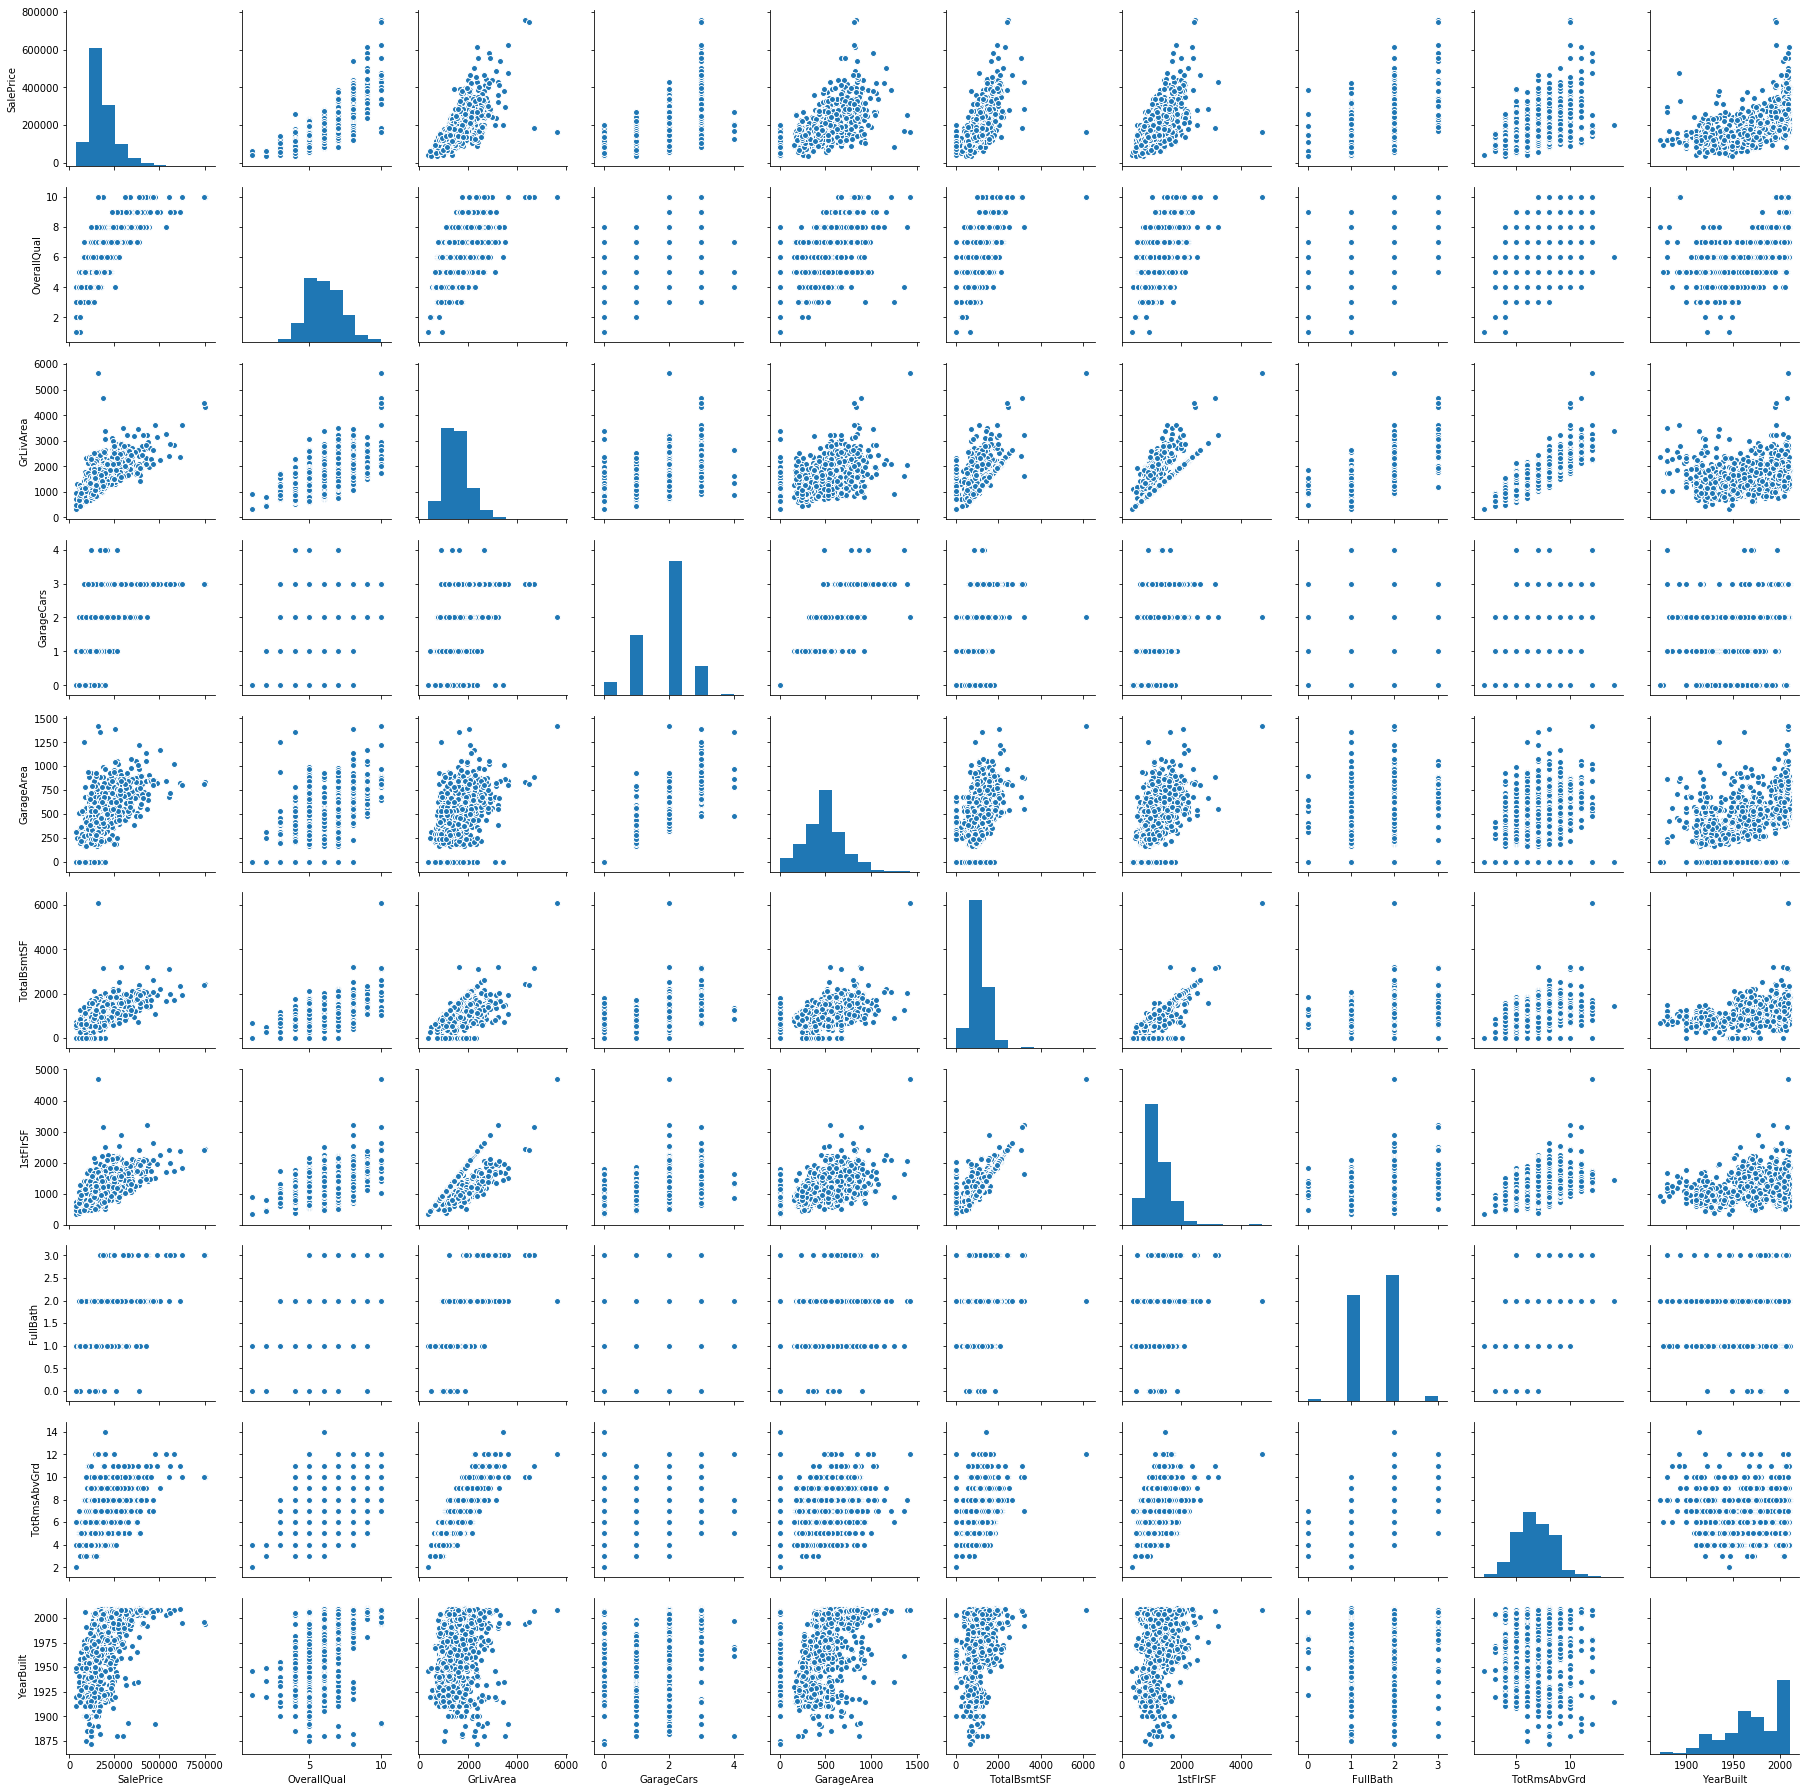

In [8]:
sns.pairplot(train[cols], size=2.5)

### Removing Outliers

In [9]:
train.drop(index=train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, axis=0, inplace=True)

Let's unify the test and train sets to conduct cleaning on the whole data set:

In [10]:
ntrain = train.shape[0]
ntest = test.shape[0]

ytrain = train['SalePrice']

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(["SalePrice"], axis=1, inplace=True)

### Removing the Unuseful Features

As it can be seen, we have a ID feature which is completely useless for out model. Therefore, we can drop it:

In [11]:
all_data.drop(['Id'], axis=1, inplace=True)

We can also drop the highly correlated features as having all of them in our model will not be useful. Highly correlated features can be viewed in the headmap in the previous section. I will remove one of the each highly correlated pair:

In [12]:
correlated_cols = ['GarageYrBlt', 'GarageArea', 'GarageCond', 'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'BsmtUnfSF']

for c in correlated_cols:
    all_data.drop(c, axis = 1, inplace=True)

In [13]:
all_data.shape

(2918, 72)

### Missing Values
Let's see how is the situation with the missing value to decide on a strategy about how to resolve them. 

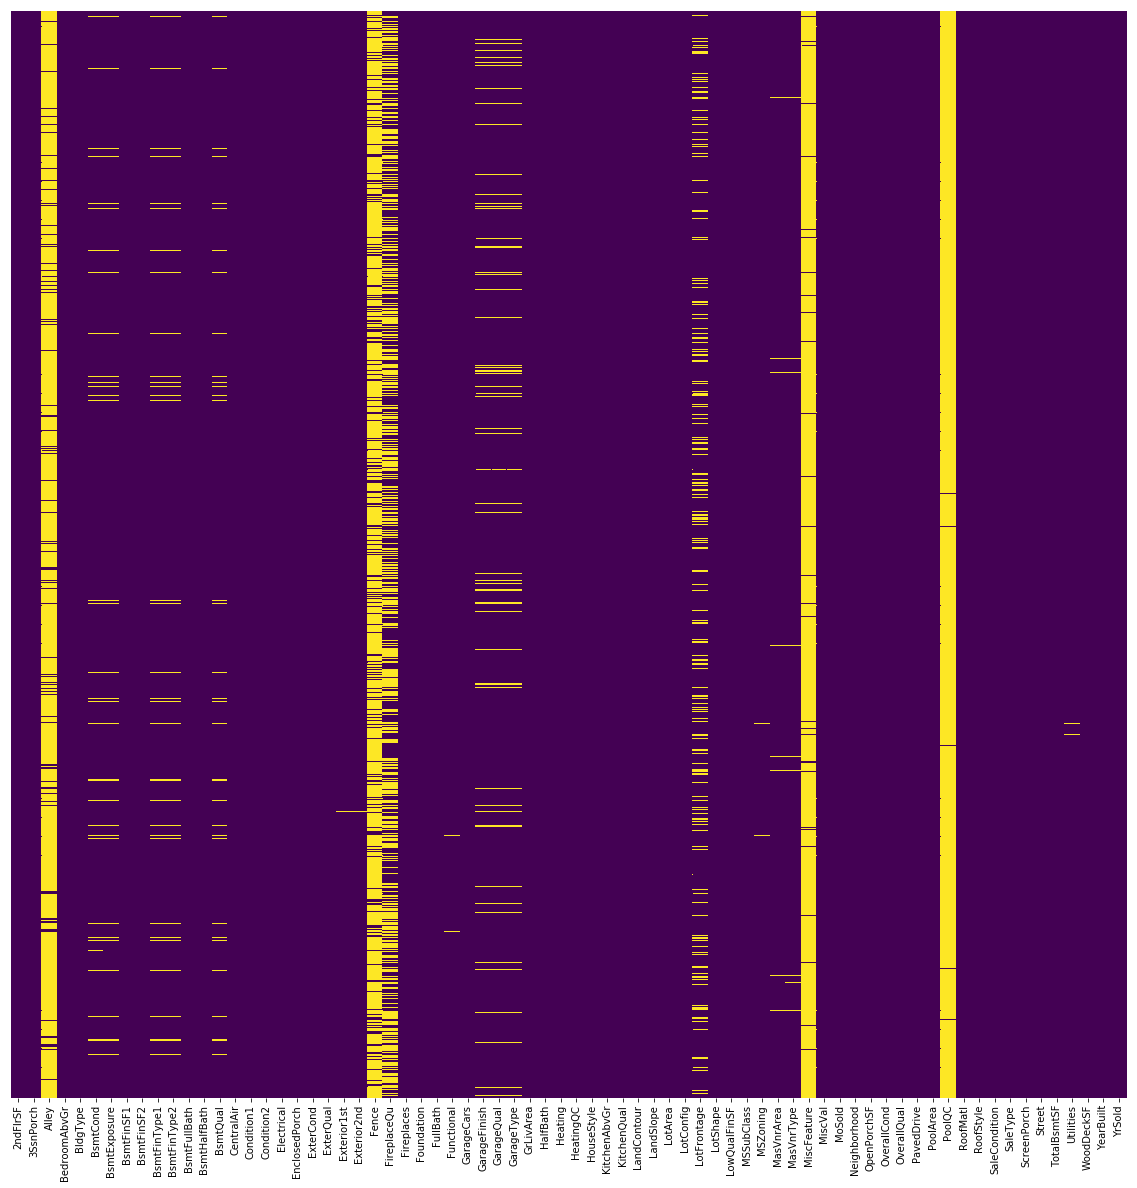

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(all_data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Here we can see that for the Target "SalePrice" we do not have any missing value.

There are features, i.e., _Alley_, _FireplaceQu_, _PoolQC_, _Fence_, and _MiscFeature_, with too many missing values that we hardly can get any useful information from the remaining values. We would probably have to completely drop these features, or to change them to another feature that can be interpreted, such as, a binary feature indicating if we have a value on them or not. To decide a good strategy, more analysis is required.

There are some other featues, i.e., _LotFrontage_, _MasVnrType_, _MasVnrArea_, _BsmtQual_, _BsmtCond_, _BsmtExposure_, _BsmtFinType1_, _BsmtFinType2_, _BsmtFinSF1_, _BsmtFinSF2_, _BsmtUnfSF_, _TotalBsmtSF_, _BsmtFullBath_ and _BsmtHalfBath_, _GarageType_, _GarageYrBlt_, _GarageArea_, _GarageCars_, _GarageQual_, _GarageCond_, _MSZoning_, _SaleType_, _Utilities_, _Function_ for which there are some missing values. For these, the proportion of the missing data is small enough to be able to fix them using one of the approaches to replace null values.

#### Imputing the Missing Values

Starting with the _Alley_, _FireplaceQu_, _PoolQC_, _Fence_, and _MiscFeature_ with most missing values, we will try to make a decision about how to manage them:

* _Alley_ is the "Type of alley access to property" according to the descriptions. And it can get three values:
        Grvl	Gravel
        Pave	Paved
        NA 	No alley access
       
Therefore, the NA value can be interpreted as no alley access to the property. We will replace null values to "None".

In [15]:
all_data["Alley"] = all_data["Alley"].fillna("None")

* _FireplaceQu_ indicates the Fireplace quality and can get the following values:

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
We will replace null values to "None".

In [16]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

* _PoolQC_ indicates the Pool quality, and can get the following values:
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
We will replace null values to "None".

In [17]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

* _Fence_ indicates the Fence quality, and can get the following values:
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
We will replace null values to "None".

In [18]:
all_data["Fence"] = all_data["Fence"].fillna("None")

* _MiscFeature_ is the Miscellaneous feature not covered in other categories:
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
We will replace null values to "None".

In [19]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Now let's move to  _LotFrontage_, _MasVnrType_, _MasVnrArea_, _BsmtQual_, _BsmtCond_, _BsmtExposure_, _BsmtFinType1_, _BsmtFinType2_, _BsmtFinSF1_, _BsmtFinSF2_, _BsmtUnfSF_, _TotalBsmtSF_, _BsmtFullBath_ and _BsmtHalfBath_, _GarageType_, _GarageYrBlt_, _GarageArea_, _GarageCars_, _GarageQual_, _GarageCond_, _MSZoning_, _SaleType_, _Utilities_, _Function_ for which there are some missing values.

* _LotFrontage_ is the linear feet of street connected to property. Here we can replace the missing values by the median or mean of all the _LotFrontage_ values. However a better approach would be to reason to find a better replacement. There is a better chance that the _LotFrontage_ of a house would be close the _LotFrontage_ of the other houses to the same neighborhood. So we can use the median of the _LotFrontage_ of the houses in the neighborhood to replace the missing values:

In [20]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

* _MasVnrType_ is the Masonry veneer type, with the following values:

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
* And _MasVnrArea_ is the Masonry veneer area in square feet.

Looking at the null values they match on both, most probably the null values indicate that there are no Masonry veneers. Therefore, we can replace null _MasVnrType_ with "None" and null _MasVnrArea_ with 0.

In [21]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

In [22]:
all_data["MasVnrArea"]= all_data["MasVnrArea"].fillna(0)

*  _BsmtQual_, _BsmtCond_, _BsmtExposure_, _BsmtFinType1_, _BsmtFinType2_, These are categorical features about the basement of the house, the Null values most probably indicate that there is no basement in the house. Therefore, we will replace null values with "None" for these features.

* _BsmtFinSF1_, _BsmtFinSF2_, _BsmtUnfSF_, _TotalBsmtSF_, _BsmtFullBath_ and _BsmtHalfBath_ : missing values are likely zero for having no basement

In [23]:
for col in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    all_data[col] = all_data[col].fillna("None")

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

*  _GarageType_,  _GarageFinish_, _GarageQual_, and _GarageCond_ are categorical features related to the Garage of the house. The Null values will most probabily indicate that the house doesn't have a Garage. Therefore, we can replace these values with None.

* _GarageYrBlt_ is the year garage was built, _GarageArea_ is the Garage Area, _GarageCars_ is the size of garage in car capacity. We replace null values with 0 indicating that there is no Garage.

In [25]:
for col in ("GarageType", "GarageFinish", "GarageQual"):
    all_data[col] = all_data[col].fillna("None")

In [26]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)

* _MSZoning_ is the general zoning classification, 'RL' is by far the most common value. So we can fill in missing values with 'RL':

In [27]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

* _Utilities_ For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . We will replace the missing values with "AllPub" which is more common:

In [28]:
all_data["Utilities"] = all_data["Utilities"].fillna("AllPub")

* _SaleType_ we can replace the missing value with the most common one:

In [29]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

* Last but not the least, _Electrical_ indicates the Electrical system with the following values:

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
 It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

* _Functional_ is the home functionality, where we should assume typical unless deductions are warranted. Therefore, we can replace the missing value with "Typ" for Typical.

In [30]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [31]:
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])

### Features Engineering

#### Type Corrections
Let's check and fix the data types that are not correct. We have some numerical data that are actually categorical. These include the following: _MSSubClass_, _OverallCond_, _YrSold_, _MoSold_. We will transform them to categorical features:

In [32]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].apply(str)
all_data['YrSold'] = all_data['YrSold'].apply(str)
all_data['MoSold'] = all_data['MoSold'].apply(str)

#### Label Encoding

We use label encoding on categorical features, to help normalize labels such that they contain only values between 0 and n_classes-1. And to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels:

In [33]:
cols= list(all_data.select_dtypes(include=[np.object]).columns)

from sklearn.preprocessing import LabelEncoder


for c in cols:
    lbl_encoder = LabelEncoder()
    lbl_encoder.fit(list(all_data[c].values))
    all_data[c] = lbl_encoder.transform(list(all_data[c].values))

#### Feature Skewness
When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics).

If the dataset is skewed, then the Machine Learning model wouldn’t be able to do a good job on predictions. To resolve the issue of the skewed features we can apply the a log transform of the same data, or to use the Box-Cox Transformation. Let's see how skewed are our numerical features:

In [34]:
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

skewed_features = all_data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_features_df = pd.DataFrame(skewed_features, columns={'Skew'})
skewed_features_df.head(10)

,Skew
Utilities,53.990743
MiscVal,21.943434
PoolArea,16.895403
LotArea,12.968281
LowQualFinSF,12.086650
Heating,12.076679
Condition2,12.058017
3SsnPorch,11.374072
RoofMatl,8.820958
MiscFeature,5.063354


In [35]:
skewed_features_df = skewed_features_df[abs(skewed_features_df) > 0.75]

from scipy.special import boxcox1p
lam = 0.15
cols = skewed_features_df.index

for c in cols:
    all_data[c] = boxcox1p(all_data[c], lam)

#### Convert Categorical Features

This is to convert categorical variable into dummy/indicator variables

In [36]:
all_data = pd.get_dummies(all_data)

#### Analysing the Target

Let's take a look at the distribution of the SalePrice which is the value that we are going to predict. One of the points that we would like to see here is to discover anomalies in our train data which would affect our final model. One example is to see if we have a min 0, or a max value which is too high.

In [37]:
ytrain.describe()

count      1459.000000
mean     180869.736806
std       79445.396888
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let's also graphically visualize the distribution of the SalePrice:

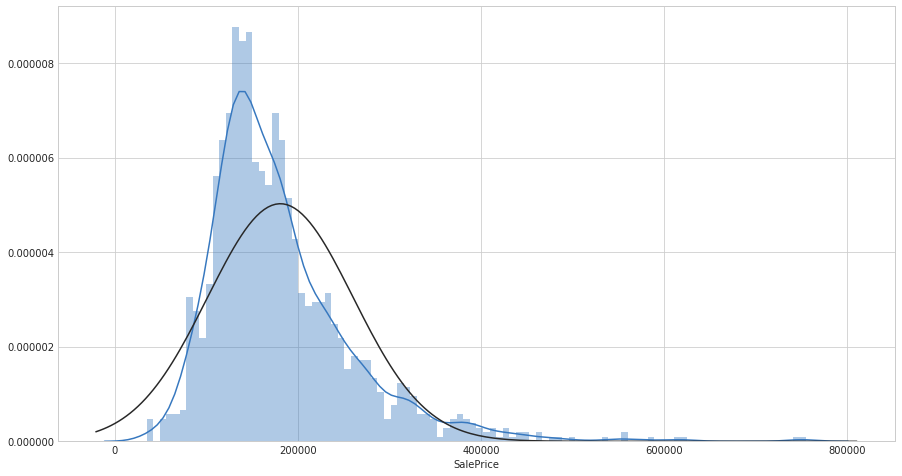

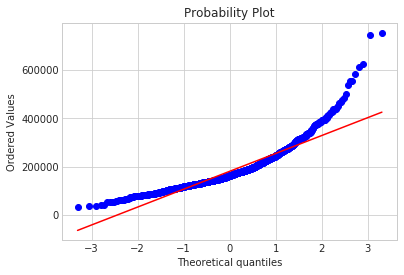

In [38]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_style('whitegrid')
sns.set_palette(sns.xkcd_palette(colors))
plt.figure(figsize=(15,8))
sns.distplot(ytrain, bins=100, fit=norm)

fig = plt.figure()
res = stats.probplot(ytrain, plot=plt)

We can see that the SalePrice is skewed to the right, and has some pickiness. As can be seen, the house prices are mainly between 80,000 and 300,000. and there are rare prices more than 400,000.

Let's see the Skewness and Kurtosis measurs of the distribution, however, they wouldn't give us more information rather than the ones we could observe on the histogram.

In [39]:
print("Skewness: {0:1.3f}".format(ytrain.skew()))
print("Kurtosis: {0:1.3f}".format(ytrain.kurt()))

Skewness: 1.885
Kurtosis: 6.546


We should also resolve the skewness in the results:

In [40]:
ytrain = boxcox1p(ytrain, lam)

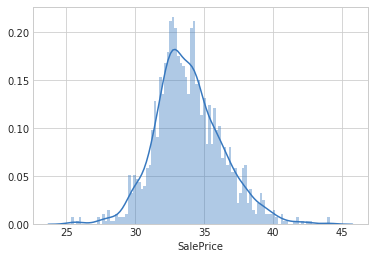

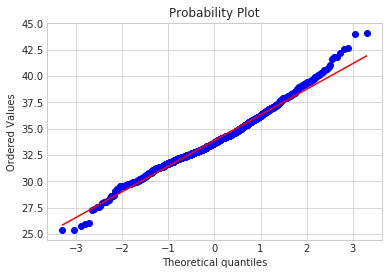

In [41]:
sns.distplot(ytrain, bins=100)

fig = plt.figure()
res = stats.probplot(ytrain, plot=plt)

In [42]:
xtrain = all_data[:ntrain]
xtest = all_data[ntrain:]

#### Check for Homoscedasticity

Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

As we have fixed the skewness in our features this issue should be fixed to. For example we can we see the scatter plot of the GrLivArea and the SalePrice that previously we saw that was cone-shaped (check the pairplot at the begining of the analysis).

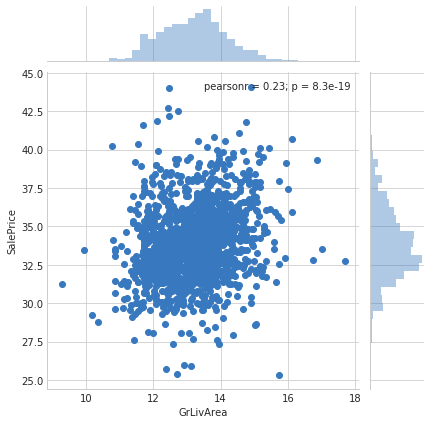

In [43]:
sns.jointplot(xtrain['GrLivArea'], ytrain)

## Modelling



Now we are going to try different regression approaches and evaluate them to choose the best model to apply. 

### Defining the Cross-Validation Strategy

First we define a 5-folds cross-validation strategy to evaluate our models:

In [44]:
k_folds = 5

def cval_score(model):
    kf = KFold(k_folds, shuffle = True, random_state = 101).get_n_splits(train.values)
    score = cross_val_score(model, xtrain.values, ytrain, cv = kf)
    return(score)

### Lasso Regression

As we have many features, I would like to try lasso which also performs feature selection and regularization that helps me to remove the unuseful features to have a less complex and better performing model.

This model may be very sensitive to outliers. To resolve this issue we can use the sklearn's Robustscaler() method on the pipeline.

In [45]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.005, random_state=101))
score = cval_score(lasso)
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(score.mean(), score.std()*2))

Accuracy: 0.88 (+/- 0.05)


In [46]:
lasso.fit(xtrain, ytrain)
lasso_predictions = lasso.predict(xtest)

### Elastic Ridge Regression

In statistics and, in particular, in the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. 

In [47]:
elastic_net_regression = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=101))
score = cval_score(elastic_net_regression)
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(score.mean(), score.std()*2))

Accuracy: 0.88 (+/- 0.04)


In [48]:
elastic_net_regression.fit(xtrain, ytrain)
elastic_net_predictions = elastic_net_regression.predict(xtest)

### Kernel Ridge Regression
Kernel ridge regression (KRR) combines Ridge Regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

The form of the model learned by KernelRidge is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses $\epsilon$-insensitive loss, both combined with l2 regularization. In contrast to SVR, fitting KernelRidge can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for $\epsilon > 0$, at prediction-time.

In [49]:
kernel_ridge_regression = KernelRidge(alpha=1.0, kernel='linear', degree=2)
score = cval_score(kernel_ridge_regression)
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(score.mean(), score.std()*2))

Accuracy: 0.88 (+/- 0.05)


In [50]:
kernel_ridge_regression.fit(xtrain, ytrain)
kernel_ridge_predictions = kernel_ridge_regression.predict(xtest)

### Gradient Boosting Regression

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. Using the Huber loss it is robust to outliers


In [51]:
gradient_boosting_regression = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = cval_score(gradient_boosting_regression)
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(score.mean(), score.std()*2))

Accuracy: 0.90 (+/- 0.03)


In [52]:
gradient_boosting_regression.fit(xtrain, ytrain)
gradient_boosting_predictions = gradient_boosting_regression.predict(xtest)

### XGBoost

XGBoost stands for “Extreme Gradient Boosting”, where the term “Gradient Boosting” originates from the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. XGBoost provides a parallel tree boosting (also known as GBDT, GBM).

In [53]:
xgboost = xgb.XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=2000, 
                             colsample_bytree=0.5, gamma=0.5,  
                             min_child_weight=2,
                             reg_alpha=0.5, reg_lambda=1,
                             subsample=0.5, silent=True,
                             random_state =101, nthread = -1)
score = cval_score(xgboost)
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(score.mean(), score.std()*2))

Accuracy: 0.91 (+/- 0.02)


In [54]:
xgboost.fit(xtrain, ytrain)
xgboost_predictions = xgboost.predict(xtest)

### LightGBM
LightGBM is a gradient boosting framework that uses tree based learning algorithms. 

In [55]:
light_gbm = lgb.LGBMRegressor(boosting_type ='gbdt', num_leaves = 5, max_depth = 3, 
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11,
                              learning_rate = 0.05, n_estimators = 1000, 
                              objective='regression', bagging_fraction = 0.8, bagging_freq = 5,
                              feature_fraction=0.5, feature_fraction_seed=9, 
                              lambda_l1=0.1, lambda_l2=0.5, min_gain_to_split=0.2,
                              random_state=101, silent=True, 
                              )

score = cval_score(light_gbm)
print("Accuracy: {:0.2f} (+/- {:0.2f})".format(score.mean(), score.std()*2))

Accuracy: 0.91 (+/- 0.02)


In [56]:
light_gbm.fit(xtrain, ytrain)
light_gbm_predictions = light_gbm.predict(xtest)

## Stacking

 Stacking, also called Super Learning or Stacked Regression, is a class of algorithms that involves training a second-level “metalearner” to find the optimal combination of the base learners. Unlike bagging and boosting, the goal in stacking is to ensemble strong, diverse sets of learners together. 

Stacking is important because it has been found to improve performance in various machine learning problems.

Here I simply use a weighted average of the trained models as a ensemble method. I use weights to give more importance to predictions of models with a higher accuracy.

In [57]:
average_predictions = (1*lasso_predictions+ 0.5*elastic_net_predictions+ 0.5*kernel_ridge_predictions+2*gradient_boosting_predictions+ 3*xgboost_predictions+ 3*light_gbm_predictions)/10

## The Submission

Now we create the submission file including the test id and predictions:

In [58]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = average_predictions
submission.to_csv('submission.csv',index=False)